# À propos de ce livret


### But du livret
Présenter les résultats des modèles roulés



### Notes sur le livret

## Préparation préalable

In [1]:
# Utilités
import os
import numpy as np
import pandas as pd

# Chargement des données
import scipy.io

# Barre de progression
from tqdm.auto import trange
from tqdm import tqdm_notebook, notebook

# Présentation
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

## Chargement des matrices


In [2]:
dossier_donnees = "../data/"
dossier_exp = "../exp/"

dossier = "transport_Seattle/"

fichier_complet = "seattle_mat50"
fichier_binaire = fichier_complet + "bin50"
fichier_binaire2 = fichier_complet + "_bin50"
fichier_pred = fichier_binaire2 + "_" + "simpleFMNN"

chemin_complet = "{:}{:}{:}.mat".format(dossier_donnees, dossier, fichier_complet)
chemin_binaire = "{:}{:}{:}.mat".format(dossier_donnees, dossier, fichier_binaire)
chemin_pred = "{:}{:}{:}.mat".format(dossier_exp, dossier, fichier_pred)

print(chemin_complet, " ", chemin_binaire, " ", chemin_pred)

../data/transport_Seattle/seattle_mat50.mat   ../data/transport_Seattle/seattle_mat50bin50.mat   ../exp/transport_Seattle/seattle_mat50_bin50_simpleFMNN.mat


In [3]:
## Charger la matrice binaire (pour trouver les index)
matrice_complet = scipy.io.loadmat(chemin_complet)
matrice_complet = matrice_complet["mat"]

# Charger la matrice de données prédites
matrice_binaire = scipy.io.loadmat(chemin_binaire)
matrice_binaire = matrice_binaire["mat"]
index = np.where(matrice_binaire == 0) # Index des valeurs à prédire

## Charger la matrice de données complètes
matrice_pred = scipy.io.loadmat(chemin_pred)
matrice_pred = matrice_pred["mat"]



# Présentation des résultats

## Présentation de l'erreur

In [4]:
## VOIR POURQUOI PAR LA MÊME!!!
rmse = np.sqrt(
    np.sum((matrice_complet[index] - matrice_pred[index])**2) /
    matrice_complet[index].shape[0])
mape = np.sum(
    np.abs(matrice_complet[index] - matrice_pred[index]) /
    matrice_complet[index]) / matrice_complet[index].shape[0]
print((rmse, mape))

(33.0052531902111, 0.5376186413623073)


## Présentations graphiques

In [5]:
y1_original = matrice_complet[1, ]
y1_pred = matrice_pred[1, ]
list_data1 = [y1_original, y1_pred]

y2_original = matrice_complet[2, ]
y2_pred = matrice_pred[2, ]
list_data2 = [y2_original, y2_pred]

y3_original = matrice_complet[3, ]
y3_pred = matrice_pred[3, ]
list_data3 = [y3_original, y3_pred]

y4_original = matrice_complet[4, ]
y4_pred = matrice_pred[4, ]
list_data4 = [y4_original, y4_pred]

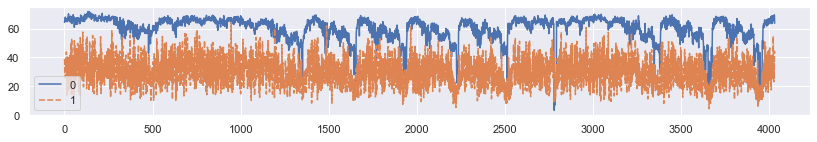

In [6]:
# 0 est original, 1 est l'autre
fig = plt.figure(figsize=(14, 2))
ax = sns.lineplot(data=list_data1)
plt.show()

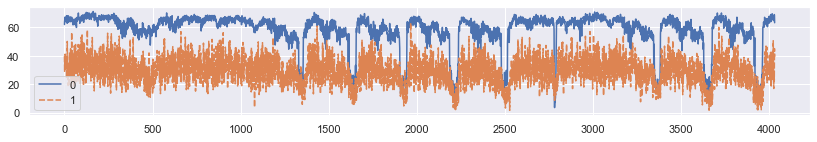

In [7]:
# 0 est original, 1 est l'autre
fig = plt.figure(figsize=(14, 2))
ax = sns.lineplot(data=list_data2)
plt.show()

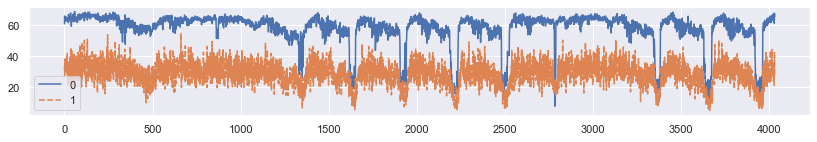

In [8]:
# 0 est original, 1 est l'autre
fig = plt.figure(figsize=(14, 2))
ax = sns.lineplot(data=list_data3)
plt.show()

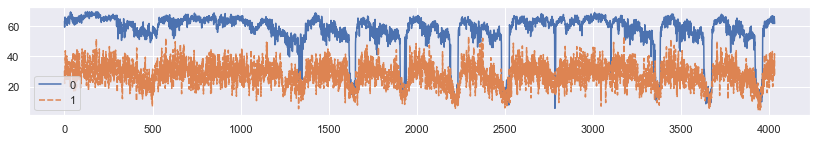

In [9]:
# 0 est original, 1 est l'autre
fig = plt.figure(figsize=(14, 2))
ax = sns.lineplot(data=list_data4)
plt.show()

## Comparaison pred vs. original

Cette comparaison montre si les données sont plus ou moins proche de la donnée originale.


Source pour le paquet : https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [10]:
## Préparation des données

## Capter les index des éléments imputés
x_pred = matrice_pred[index]
y_original = matrice_complet[index]

## Avoir la distance entre les deux éléments
dist_axe = np.abs(x_pred - y_original)

## Créer un dataframe en forme "longue"
df = pd.DataFrame([x_pred, y_original, dist_axe]).T
df.columns = ['x_pred', 'y_original', 'dist_axe']

# Déterminer des quantiles pour le graphique
q0 = df.dist_axe.quantile(0.0)
q1 = df.dist_axe.quantile(0.25)
q2 = df.dist_axe.quantile(0.5)
q3 = df.dist_axe.quantile(0.75)
q4 = df.dist_axe.quantile(1.0)

## Créer une colonne avec les catégories
df['size'] = [
    1 if q1 > x >= q0 else
    2 if q2 > x >= q1 else 3 if q3 > x >= q2 else 4 if q4 > x >= q3 else 5
    for x in df['dist_axe']
]

print((
    "Quantiles : \n\t{0:6f} \n\t{1:6f} \n\t{2:6f} \n\t{3:6f} \n\t{4:6f}"
    .format(q0, q1, q2, q3, q4)))

Quantiles : 
	0.000017 
	25.856554 
	31.796359 
	37.540696 
	77.240341


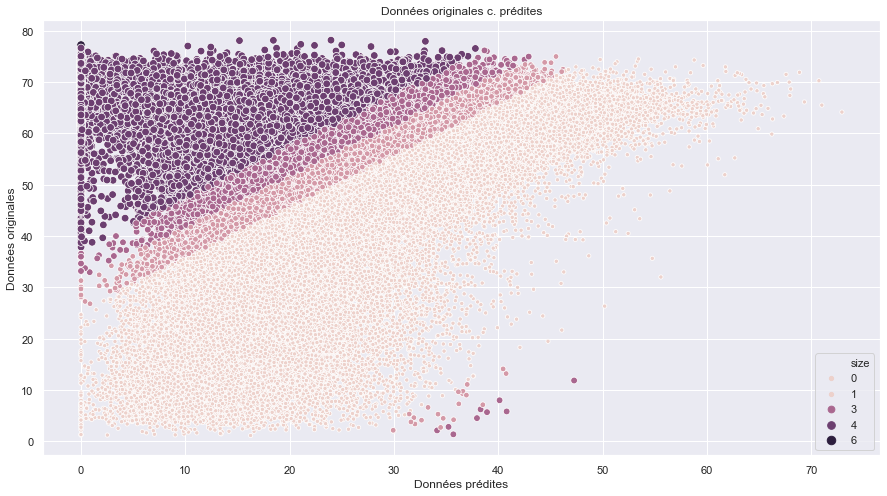

In [11]:
# Plus le cercle est foncé, moins la prédiction est proche de la vraie valeur
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="x_pred",
                     y="y_original",
                     hue="size",
                     size="size",
                     data=df)

ax.set(xlabel='Données prédites', ylabel='Données originales', title = "Données originales c. prédites")
plt.show()